In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


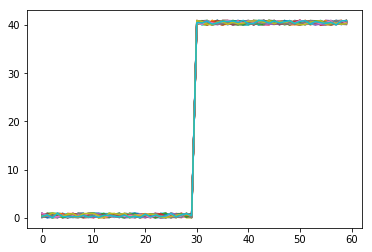

In [44]:
g = np.random.rand(30,60)
g[:,30:] = g[:,30:] + 40
import matplotlib.pyplot as plt
for i in g:
    plt.plot(i)
plt.show()


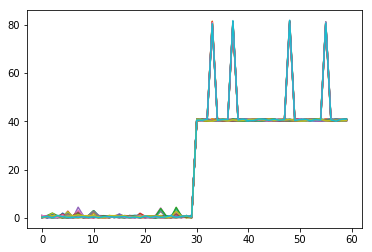

In [45]:
c1_peaks = [5,10,19]
c2_peaks = [7,23,26]
c3_peaks = [2,4, 15,33,37,48,55]
g[::3,c1_peaks] = g[::3,c1_peaks]*3
g[1::3,c2_peaks] = g[1::3,c2_peaks]*5
g[2::3,c3_peaks] = g[2::3,c3_peaks]*2
for i in g:
    plt.plot(i)
X = g

In [24]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# Standardization

In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# a) Covariance matrix

In [47]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.03448276 -0.38003957  0.11077553 ... -0.22105237  0.08272368
   0.13409127]
 [-0.38003957  1.03448276 -0.10099435 ... -0.20712915 -0.03327859
   0.34114696]
 [ 0.11077553 -0.10099435  1.03448276 ...  0.04133524 -0.30917444
   0.33012013]
 ...
 [-0.22105237 -0.20712915  0.04133524 ...  1.03448276 -0.24311988
  -0.19497359]
 [ 0.08272368 -0.03327859 -0.30917444 ... -0.24311988  1.03448276
   0.0730753 ]
 [ 0.13409127  0.34114696  0.33012013 ... -0.19497359  0.0730753
   1.03448276]]


In [48]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([ 8.27543309e+00+0.00000000e+00j,  5.16305718e+00+0.00000000e+00j,
        4.92333128e+00+0.00000000e+00j,  4.02533276e+00+0.00000000e+00j,
        3.67646788e+00+0.00000000e+00j,  3.55650246e+00+0.00000000e+00j,
        3.22079740e+00+0.00000000e+00j,  3.12843657e+00+0.00000000e+00j,
        2.83104729e+00+0.00000000e+00j,  2.51225425e+00+0.00000000e+00j,
        2.41459969e+00+0.00000000e+00j,  2.19845702e+00+0.00000000e+00j,
        2.01701008e+00+0.00000000e+00j,  1.81374483e+00+0.00000000e+00j,
        1.74087029e+00+0.00000000e+00j,  1.49814022e+00+0.00000000e+00j,
        1.39539196e+00+0.00000000e+00j,  1.22367221e+00+0.00000000e+00j,
        1.05879483e+00+0.00000000e+00j,  1.02144641e+00+0.00000000e+00j,
        8.07835837e-01+0.00000000e+00j,  7.12431536e-01+0.00000000e+00j,
        2.41544031e-01+0.00000000e+00j,  5.72347923e-01+0.00000000e+00j,
        5.36714356e-01+0.00000000e+00j,  3.02395083e-01+0.00000000e+00j,
        4.42789121e-01+0.00000000e+00j,  3.56765465

# b) Correlation matrix

In [49]:
cor_mat1 = np.corrcoef(X_std.T)#, rowvar = False)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)


# c) Singuar Value decomposition

In [50]:
# Center the data (if standardizatin has not been applied earlier)
X = X_std - np.mean(X_std, axis=0)
print(X_std)
svd_eigen_vecs,s,v = np.linalg.svd(X.T,full_matrices=False)
#svd_eigen_vals = s**2
#svd_eigen_vals

[[ 1.22201966 -1.91393171 -0.84560209 ...  1.85710043  0.89965673
  -0.81425132]
 [-0.69757302  0.10419906  0.48444921 ...  1.03681331  0.27444372
   0.57597543]
 [-0.75377908  1.87086245  2.53246438 ...  0.02250648  0.17921157
   0.93061452]
 ...
 [-1.37420421  0.25370512 -0.44424535 ...  1.86189497 -1.28769569
  -1.9260315 ]
 [-0.27060823  0.02221123  0.67140215 ... -0.073682   -1.34958012
  -0.92548281]
 [-0.54531497  0.62731186 -0.9347547  ... -1.40251716  1.15737015
   1.51982232]]


# 3) Sorting eigen values 

In [51]:
%qtconsole

In [52]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
#eig_pairs.sort()
#eig_pairs.reverse()

# Reducing the space

In [53]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

ValueError: cannot reshape array of size 60 into shape (4,1)

# Reprojecting to the new space

In [49]:
scores = X_std.dot(matrix_w)
scores

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

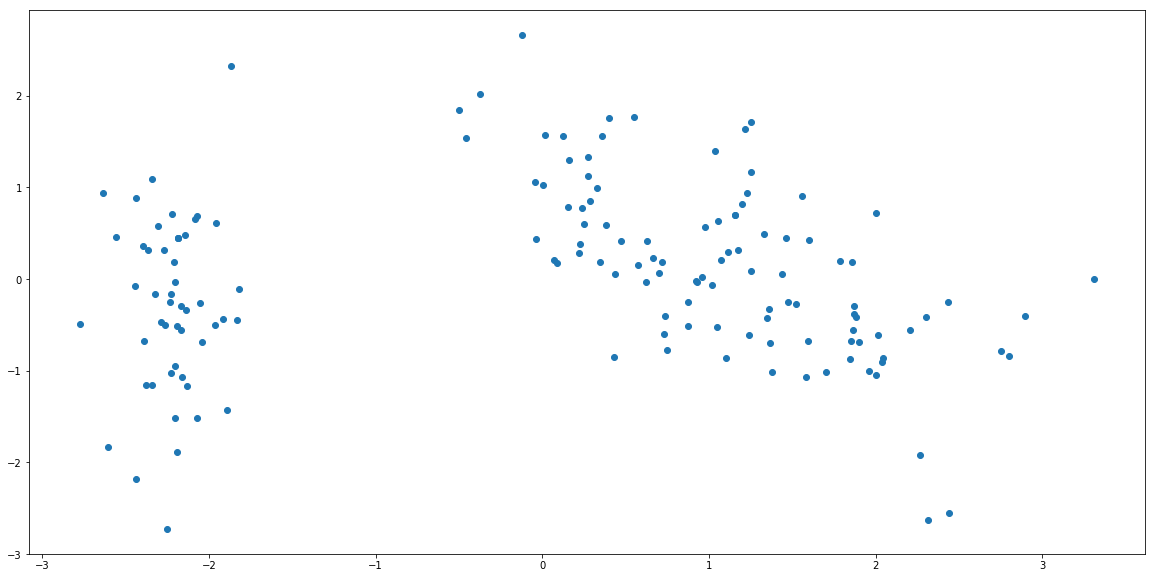

In [50]:
import matplotlib.pyplot as plt 
plt.scatter(scores[:,0],scores[:,1])

In [51]:
def PCA_plot(data,standardization=False,method='corrcoef',plot=True, rowvar = False):
    if standardization:
        from sklearn.preprocessing import StandardScaler
        data = StandardScaler().fit_transform(data)
    if method != 'sklearn':
        if method in ('corrcoef','cov'):
            X = eval("np.%s(data, rowvar=%s)" %(method,rowvar))
            eig_vals, eig_vecs = np.linalg.eig(X)
        if method == 'svd':
            X = data - np.mean(data, axis=0)
            eig_vecs,s,v = np.linalg.svd(X.T,full_matrices=False)
            eig_vals = s**2 # this is strange
        # Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs.sort()
        eig_pairs.reverse()
        # Reducing the space
        matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                          eig_pairs[1][1].reshape(4,1)))
        scores = data.dot(matrix_w)
    else: 
        from sklearn.decomposition import PCA as sklearnPCA
        sklearn_pca = sklearnPCA(n_components=2)
        scores = sklearn_pca.fit_transform(data)
    
    if plot:
        scaler = ''
        if standardization:
            scaler = ' (Scaled)'
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(scores[:,0],scores[:,1])
        ax.set_title(method+scaler)
    else:
        return scores
        

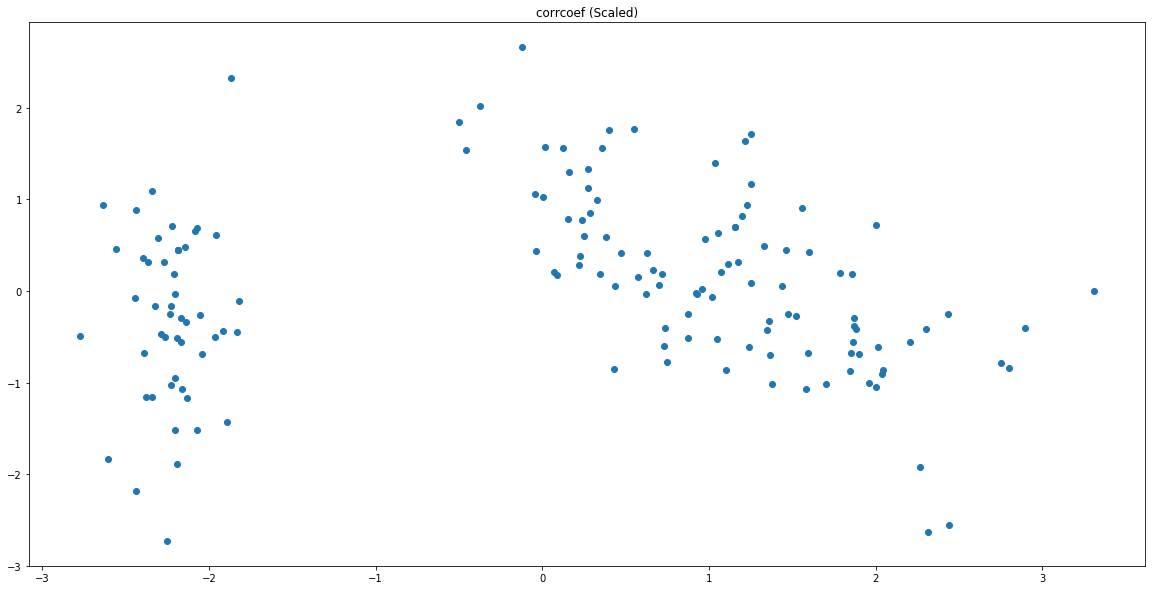

In [52]:
PCA_plot(X,standardization=True)

In [53]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

# Questo è il titolo 
Alla fine **puoi usare** il mark up _non sono bene__ però funziona. 

In [59]:
import matplotlib
fig2 = plt.figure()
std = [False,True]
methods = ['cov','corrcoef','svd','sklearn']
axs = {}
current_plot = 420
plt.rcParams["figure.figsize"] = (20,10)
print(X.shape)
for meth in methods:   
    for scal in std:
        current_plot += 1
        scaled = ''
        if scal:
            scaled = ' (Scaled)'
        scores = PCA_plot(g,method=meth,standardization=scal,plot=False)
        axs[current_plot] = fig2.add_subplot(current_plot)
        axs[current_plot].scatter(scores[:,0],scores[:,1])
        axs[current_plot].set_title(meth+scaled)
        plt.tight_layout()

    

(150, 4)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1440x720 with 0 Axes>

In [ ]:
print(3)


In [127]:
matplotlib.rc_params()

/Users/giacomo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3